In [1]:
## Imports ##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/ukdemand_09-23.csv', parse_dates=['settlement_date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245252 entries, 0 to 245251
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   settlement_date            245252 non-null  datetime64[ns]
 1   settlement_period          245252 non-null  int64         
 2   period_hour                245252 non-null  object        
 3   nd                         245252 non-null  int64         
 4   tsd                        245252 non-null  int64         
 5   england_wales_demand       245252 non-null  int64         
 6   embedded_wind_generation   245252 non-null  int64         
 7   embedded_wind_capacity     245252 non-null  int64         
 8   embedded_solar_generation  245252 non-null  int64         
 9   embedded_solar_capacity    245252 non-null  int64         
 10  non_bm_stor                245252 non-null  int64         
 11  pump_storage_pumping       245252 non-null  int64   

In [3]:
# Forward fill NAs
df.columns = ['settlement_date', 'settlement_period', 'period_hour', 'demand_mw', 'trans_demand_mw',
                'england_wales_demand', 'est_wind_generation_mw',
                'est_wind_capacity_mw', 'est_solar_generation_mw',
                'est_solar_capacity_mw', 'st_reserve_mw', 'pump_storage',
                'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow',
                'nemo_flow', 'is_holiday']
                
df = df.drop(['period_hour', 'ifa_flow', 'ifa2_flow', 'britned_flow',
              'moyle_flow', 'east_west_flow', 'nemo_flow', 'is_holiday'],
              axis=1)
#df['energy'] = df['energy'].fillna(method='ffill')
df.head()

,settlement_date,settlement_period,demand_mw,trans_demand_mw,england_wales_demand,est_wind_generation_mw,est_wind_capacity_mw,est_solar_generation_mw,est_solar_capacity_mw,st_reserve_mw,pump_storage
0,2009-01-01 00:00:00,1,37910,38704,33939,54,1403,0,0,0,33
1,2009-01-01 00:30:00,2,38047,38964,34072,53,1403,0,0,0,157
2,2009-01-01 01:00:00,3,37380,38651,33615,53,1403,0,0,0,511
3,2009-01-01 01:30:00,4,36426,37775,32526,50,1403,0,0,0,589
4,2009-01-01 02:00:00,5,35687,37298,31877,50,1403,0,0,0,851


## Visualize Training Data

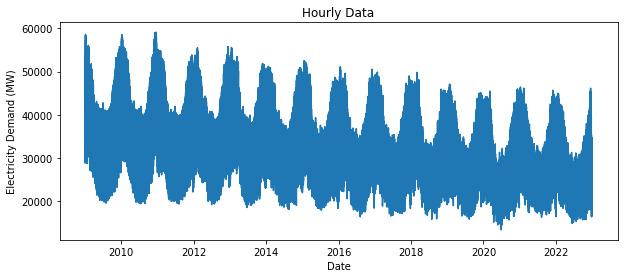

In [4]:
df = df[df.settlement_date.dt.year <= 2022]

# plot current in train over dates
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df.settlement_date, df.demand_mw)
ax.set_title('Hourly Data')
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Demand (MW)')
plt.show()

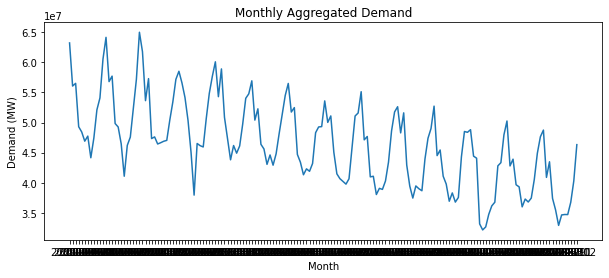

In [5]:
# monthly graph
df2 = df.copy()
df2['fiscalno'] = df2['settlement_date'].dt.strftime('%Y%m')
df2['year'] = df2['settlement_date'].dt.year

grp = df2.groupby('fiscalno')['demand_mw'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(grp.fiscalno, grp.demand_mw)
ax.set_title('Monthly Aggregated Demand')
ax.set_xlabel('Month')
ax.set_ylabel('Demand (MW)')
plt.show()

C:\Users\Ty Martz\AppData\Local\Temp\ipykernel_4032\111733780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['month'] = df2['settlement_date'].dt.month


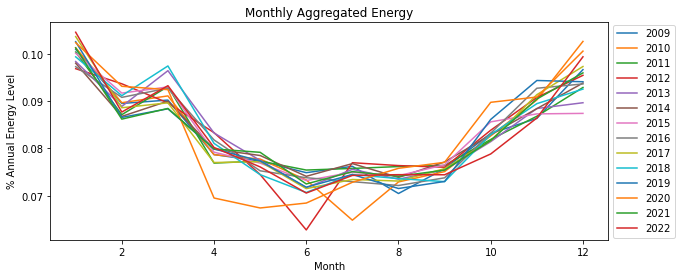

In [6]:
# in each year see which months use the most energy
month_df = df2.copy()
month_df['month'] = month_df['settlement_date'].dt.month
grpd = month_df.groupby('month')['demand_mw'].sum().reset_index()

for y in list(df2['year'].unique()):
    tmp = df2[df2['year'] == y]
    tmp['month'] = df2['settlement_date'].dt.month
    grp = tmp.groupby('month')['demand_mw'].sum().reset_index()
    grpd[f'annual_pct_{y}'] = grp['demand_mw'] / grp['demand_mw'].sum()

grp_ann = grpd.drop(['demand_mw'], axis=1).set_index('month')

leg_yrs = [c[-4:] for c in grp_ann.columns]

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(grp_ann)
ax.set_title('Monthly Aggregated Energy')
ax.set_xlabel('Month')
ax.set_ylabel('% Annual Energy Level')
#plt.legend(grp_ann.columns)
plt.legend(leg_yrs, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

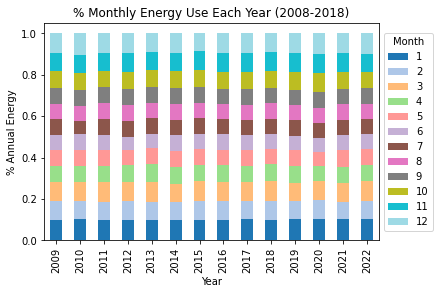

In [7]:
trans = grp_ann.transpose()
trans.index = [t[-4:] for t in trans.index]
trans.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('% Monthly Energy Use Each Year (2008-2018)')
plt.xlabel('Year')
plt.ylabel('% Annual Energy')
plt.legend(trans.columns, loc='center left', bbox_to_anchor=(1, 0.5), title='Month')
plt.show()